# Elec 405 - Homework 1

In [5]:
using LinearAlgebra
using Plots

## 8. Affine Approximation

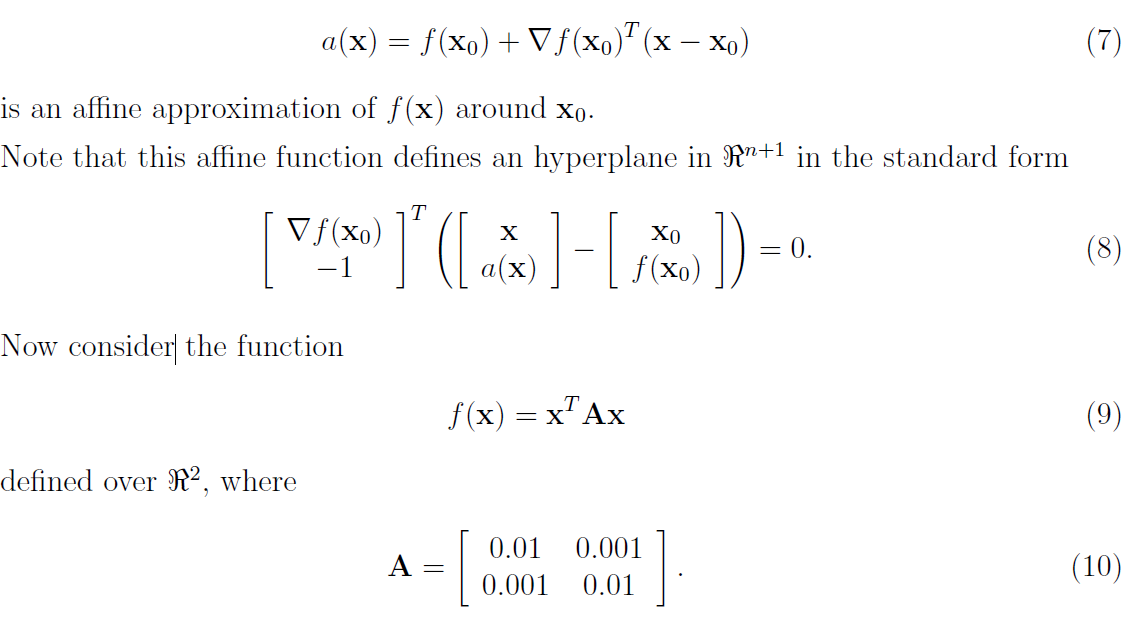

In [6]:
A = [0.01 0.001; 0.001 0.01]
A

2×2 Array{Float64,2}:
 0.01   0.001
 0.001  0.01 

In [7]:
function draw_hyperplane_3D_modified(a, b, camera=(60, 45))
    
#     pyplot()
    x=range(-50, stop=50, length=100)
    y=range(-50, stop=50, length=100)
    g(x, y) = (dot(a, b) - dot(a[1: 2], [x; y]))/a[3]
    plot!(x, y, g, 
        label="$(a)'(x-$(b))=0",
        xlabel="x_1", ylabel="x_2", zlabel="x_3",
        st=:surface, camera=camera)

    # # plot the normal vector, since b is on the plane plot the vector b to b+a
    a_x1 = range(b[1], stop=(b[1]+15*a[1]), length=100)
    a_x2 = range(b[2], stop=(b[2]+15*a[2]), length=100)
    a_x3 = range(b[3], stop=(b[3]+15*a[3]), length=100)
    plot!(a_x1, a_x2, a_x3, label="a")
end

function draw_hyperplane_3D(a, b, p, camera=(60, 45))
    pyplot()
    x=range(-2, stop=2, length=100)
    y=range(-2, stop=2, length=100)
    g(x, y) = (dot(a, b) - dot(a[1: 2], [x; y]))/a[3]
    p= plot(x, y, g, 
        title="Hyperplane in 3D",
        label="$(a)'(x-$(b))=0",
        xlabel="x_1", ylabel="x_2", zlabel="x_3",
        xlims= (-2, 2), ylims=(-2, 2), zlims=(-2, 2),
        st=:surface, camera=camera)
    
    # plot the normal vector, since b is on the plane plot the vector b to b+a
    a_x1 = range(b[1], stop=(b[1]+a[1]), length=100)
    a_x2 = range(b[2], stop=(b[2]+a[2]), length=100)
    a_x3 = range(b[3], stop=(b[3]+a[3]), length=100)
    plot!(a_x1, a_x2, a_x3, label="a")
end

draw_hyperplane_3D (generic function with 2 methods)

In [8]:
function affine_approx(x, f, f_der, x_0)
    return f(x_0) + dot(f_der(x_0), (x-x_0))
end

function f(x)
    return x' * A * x
end

function nabla_f(x)
    return (A+A')x
end

nabla_f (generic function with 1 method)

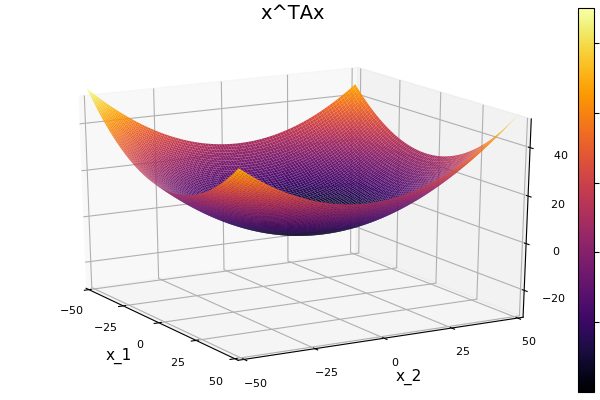

In [11]:

camera=(60, 20)
# draw_hyperplane_3D()
pyplot()
x=range(-50, stop=50, length=100)
y=range(-50, stop=50, length=100)
g(x, y) = ([x y] * A * [x; y])[1]
p= plot(x, y, g,
    title="x^TAx",
    label="x^TAx",
    xlabel="x_1", ylabel="x_2",
    zlims=(-30,50),
    st=:surface, camera=camera)



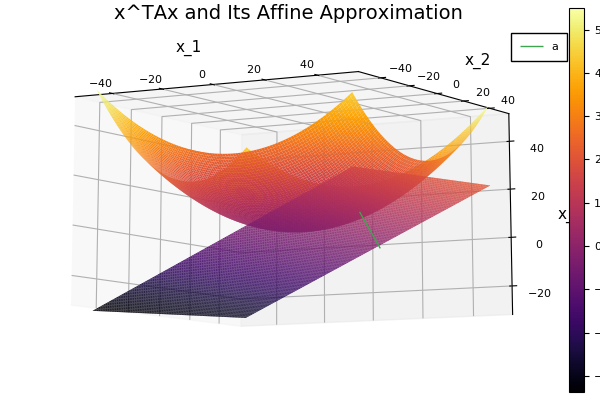

In [12]:
camera=(30, -10)


pyplot()
x=range(-50, stop=50, length=100)
y=range(-50, stop=50, length=100)
g(x, y) = ([x y] * A * [x; y])[1]
p= plot(x, y, g,
    title="x^TAx and Its Affine Approximation",
    label="x^TAx",
    xlabel="x_1", ylabel="x_2",
    zlims=(-30,50),
    st=:surface, camera=camera)

x_0 = [25; 0]
a = [nabla_f(x_0); -1]
b = [x_0; f(x_0)]

draw_hyperplane_3D_modified(a, b, camera)
